In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Machine learning models & evaluation tools
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# XGBoost
import xgboost as xgb


In [4]:
# Load the dataset
crimes_df = pd.read_csv(r'C:\Users\praveen agarwal\Desktop\Domestic_vilolence in india\data\CrimesOnWomenData.csv')

# Load the description of crime types
description_df = pd.read_csv(r'C:\Users\praveen agarwal\Desktop\Domestic_vilolence in india\data\CrimesOnWomenData.csv')


In [5]:
# Preview Crimes Dataset
print("CrimesOnWomenData")
display(crimes_df.head())

# Preview Description Dataset
print("\nDescription")
display(description_df.head())


CrimesOnWomenData


,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0



Description


,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


**DATA CLEANING**

In [6]:
# Create a dictionary to rename columns
column_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap and Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Minors',
    'DV': 'Domestic Violence',
    'WT': 'Witchcraft'
}

# Rename columns in the dataset
crimes_df.rename(columns=column_names, inplace=True)

# Check the renamed columns
print("\nRenamed Columns:")
print(crimes_df.columns)


Renamed Columns:
Index(['Unnamed: 0', 'State', 'Year', 'Rape Cases', 'Kidnap and Assault',
       'Dowry Deaths', 'Assault on Women', 'Assault on Minors',
       'Domestic Violence', 'Witchcraft'],
      dtype='object')


In [7]:
# Check for missing values
print("Missing values in each column:\n")
print(crimes_df.isnull().sum())

# Check for duplicate records
print("\nNumber of duplicate rows:")
print(crimes_df.duplicated().sum())

# Check data types of all columns
print("\nData Types:")
print(crimes_df.dtypes)


Missing values in each column:

Unnamed: 0            0
State                 0
Year                  0
Rape Cases            0
Kidnap and Assault    0
Dowry Deaths          0
Assault on Women      0
Assault on Minors     0
Domestic Violence     0
Witchcraft            0
dtype: int64

Number of duplicate rows:
0

Data Types:
Unnamed: 0             int64
State                 object
Year                   int64
Rape Cases             int64
Kidnap and Assault     int64
Dowry Deaths           int64
Assault on Women       int64
Assault on Minors      int64
Domestic Violence      int64
Witchcraft             int64
dtype: object


In [8]:
# Drop the unnecessary columns
crimes_df_cleaned = crimes_df.drop(columns=['Unnamed: 0'])

# Check the cleaned DataFrame
print("\nCleaned Dataset Columns:")
print(crimes_df_cleaned.columns)
print("\nFirst 5 Rows of the Cleaned Dataset:")
print(crimes_df_cleaned.head())


Cleaned Dataset Columns:
Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')

First 5 Rows of the Cleaned Dataset:
               State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
0     ANDHRA PRADESH  2001         871                 765           420   
1  ARUNACHAL PRADESH  2001          33                  55             0   
2              ASSAM  2001         817                1070            59   
3              BIHAR  2001         888                 518           859   
4       CHHATTISGARH  2001         959                 171            70   

   Assault on Women  Assault on Minors  Domestic Violence  Witchcraft  
0              3544               2271               5791           7  
1                78                  3                 11           0  
2               850                  4               1248           0  
3 

In [10]:
# Dataset info
print("\nCleaned Dataset Info:")
crimes_df_cleaned.info()

# Summary statistics
print("\nSummary Statistics:")
print(crimes_df_cleaned.describe(include='all'))
print(crimes_df_cleaned.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               736 non-null    object
 1   Year                736 non-null    int64 
 2   Rape Cases          736 non-null    int64 
 3   Kidnap and Assault  736 non-null    int64 
 4   Dowry Deaths        736 non-null    int64 
 5   Assault on Women    736 non-null    int64 
 6   Assault on Minors   736 non-null    int64 
 7   Domestic Violence   736 non-null    int64 
 8   Witchcraft          736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB

Summary Statistics:
                    State         Year   Rape Cases  Kidnap and Assault  \
count                 736   736.000000   736.000000          736.000000   
unique                 70          NaN          NaN                 NaN   
top     Arunachal Pradesh          NaN          

**Exploratory data analysis**

1. Total Crimes by Year (All Categories Combined)

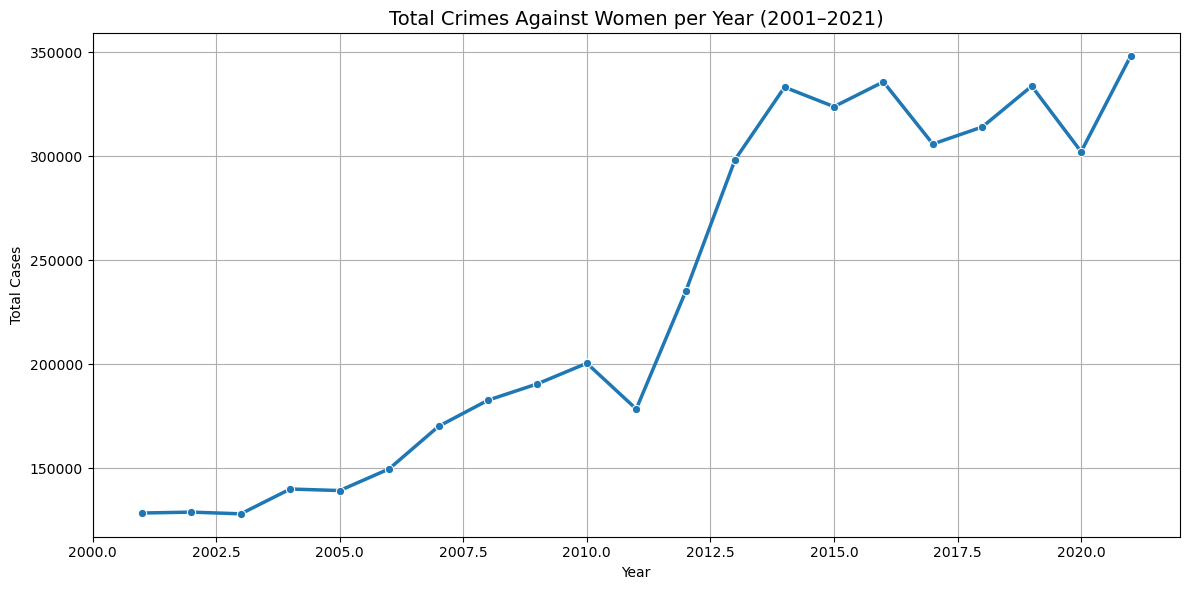

In [11]:
# Calculate total cases per year by summing across all crime types
crimes_df_cleaned['Total_Cases'] = crimes_df_cleaned.iloc[:, 2:].sum(axis=1)

yearly_total = crimes_df_cleaned.groupby('Year')['Total_Cases'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_total, x='Year', y='Total_Cases', marker='o', linewidth=2.5)
plt.title("Total Crimes Against Women per Year (2001–2021)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


2. Total Crimes by State (Cumulative)


In [12]:
print(crimes_df_cleaned.columns.tolist())


['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths', 'Assault on Women', 'Assault on Minors', 'Domestic Violence', 'Witchcraft', 'Total_Cases']


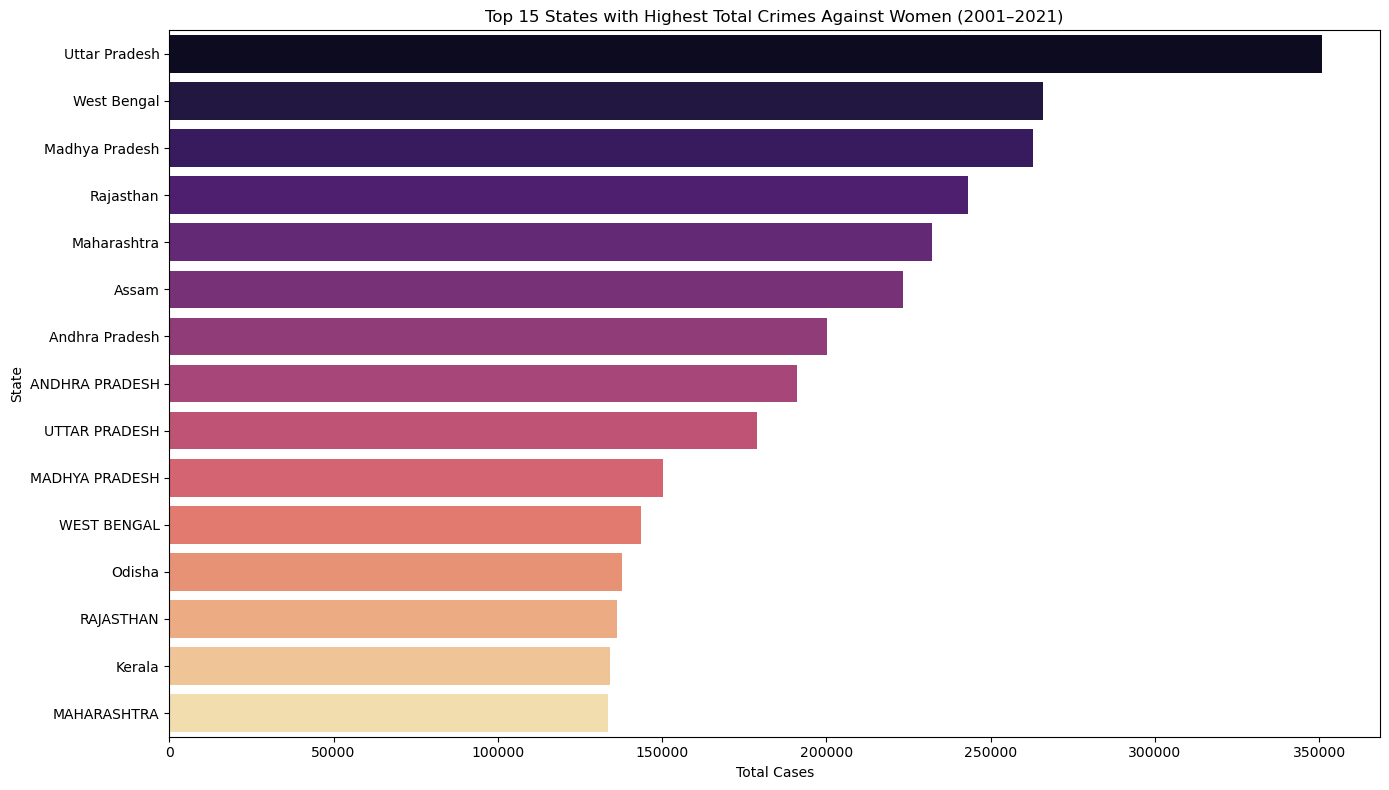

In [13]:

# Group by State and sum total cases
statewise_total = crimes_df_cleaned.groupby('State')['Total_Cases'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(14,8))
sns.barplot(data=statewise_total.head(15), x='Total_Cases', y='State', palette='magma')
plt.title("Top 15 States with Highest Total Crimes Against Women (2001–2021)")
plt.xlabel("Total Cases")
plt.ylabel("State")
plt.tight_layout()
plt.show()


3. Domestic Violence Trend by Year


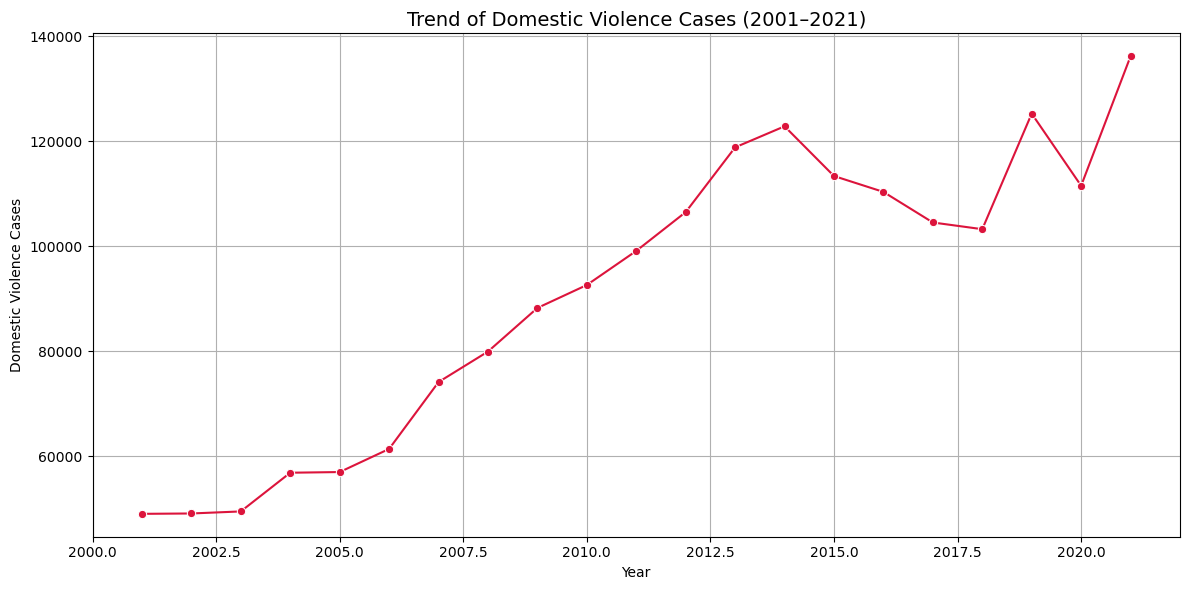

In [14]:

# Group domestic violence cases year-wise
dv_yearwise = crimes_df_cleaned.groupby('Year')['Domestic Violence'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(12,6))
sns.lineplot(data=dv_yearwise, x='Year', y='Domestic Violence', marker='o', color='crimson')
plt.title("Trend of Domestic Violence Cases (2001–2021)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Domestic Violence Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


4. Heatmap: State vs Year (Total Cases)


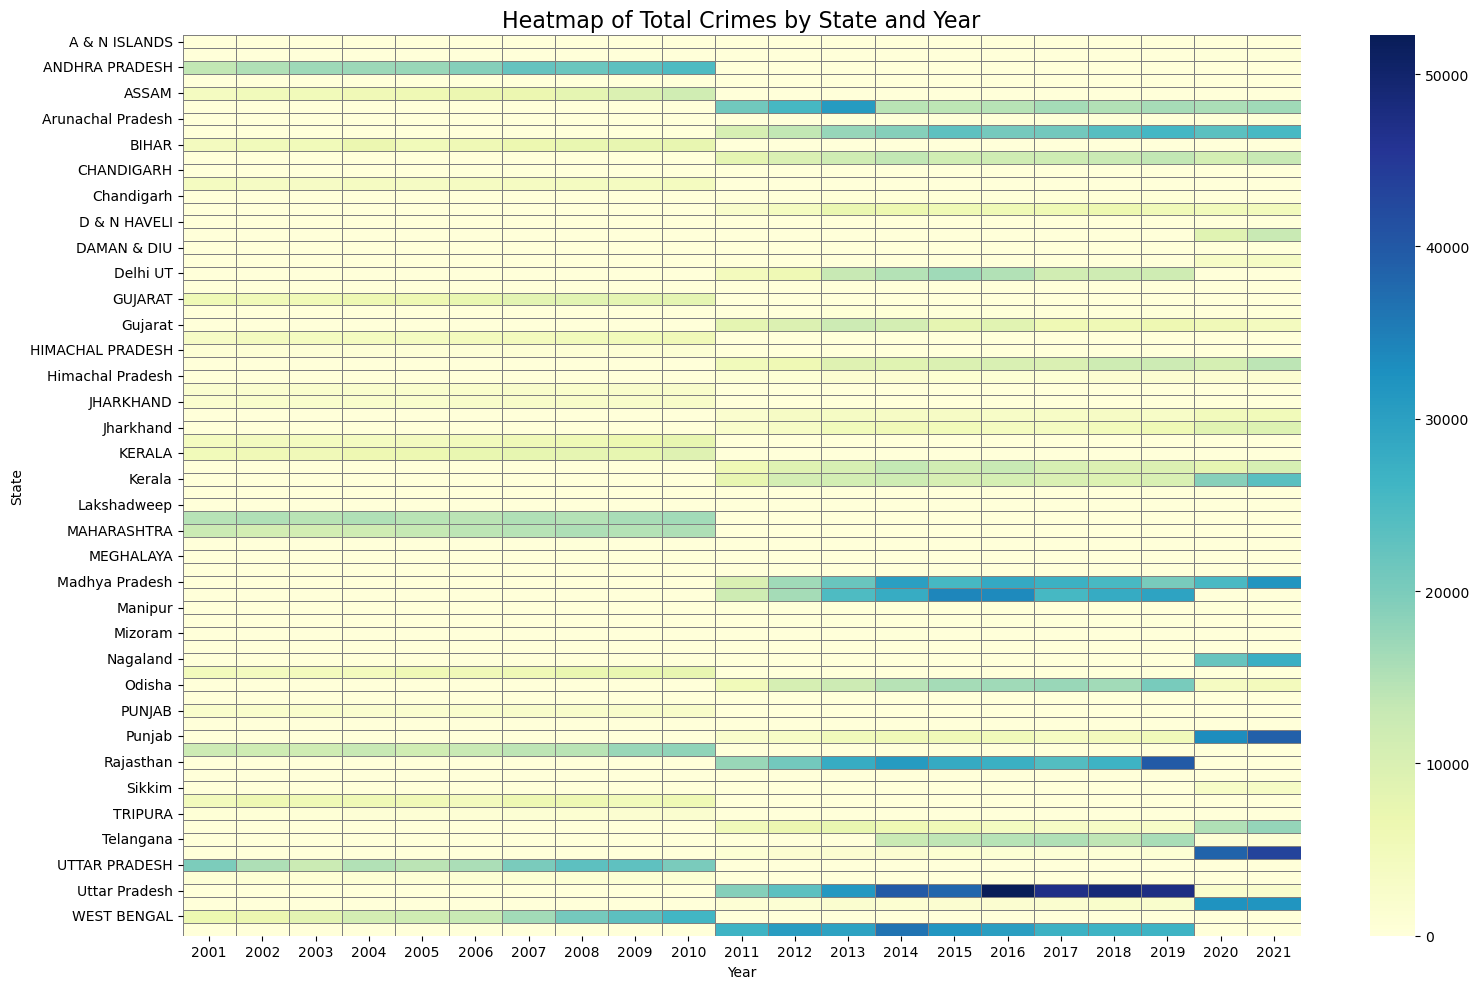

In [15]:
# Create pivot table with State vs Year
heatmap_data = crimes_df_cleaned.pivot_table(values='Total_Cases', index='State', columns='Year', aggfunc='sum', fill_value=0)

# Plot heatmap
plt.figure(figsize=(16,10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Total Crimes by State and Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


1. Rape Cases by State (Bubble Scatter Plot)

In [16]:
import plotly.express as px
import pandas as pd

# Create a scatter plot with states on the x-axis and a dummy y-axis (for visualization purposes)
fig = px.scatter(crimes_df_cleaned,
                 x="State",
                 y=[0]*len(crimes_df_cleaned),  # Dummy Y axis
                 size="Rape Cases",
                 color="Rape Cases",
                 hover_name="State",
                 title="Rape Cases in India by State",
                 size_max=100,
                 color_continuous_scale=px.colors.sequential.Viridis)  # Change color scale here

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

# Increase plot width
fig.update_layout(yaxis=dict(visible=False),
                  xaxis=dict(tickangle=45),
                  showlegend=False,
                  width=1200)  # Adjust width here

fig.show()


Total Crimes by Year (Interactive Line Plot)

In [17]:
fig = px.line(crimes_df_cleaned.groupby("Year").sum().reset_index(),
              x="Year",
              y="Total_Cases",
              markers=True,
              title="Total Crimes Against Women (2001–2021)",
              labels={"Total_Cases": "Total Reported Cases"})

fig.update_layout(width=1000, height=500)
fig.show()


 Top 10 States with Most DV Cases

In [18]:
dv_by_state = crimes_df_cleaned.groupby("State")["Domestic Violence"].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(dv_by_state,
             x="State",
             y="Domestic Violence",
             title="Top 10 States by Domestic Violence Cases",
             color="Domestic Violence",
             text="Domestic Violence",
             color_continuous_scale="Reds")

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(width=1000)
fig.show()


Treemap: Share of Total Crimes by State

In [19]:
state_total = crimes_df_cleaned.groupby("State")["Total_Cases"].sum().reset_index()

fig = px.treemap(state_total,
                 path=["State"],
                 values="Total_Cases",
                 title="Total Crime Share by State (Treemap)",
                 color="Total_Cases",
                 color_continuous_scale="Aggrnyl")

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


**DATA PREPROCESSING**

In [20]:
# Feature columns (independent variables)
features = ['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
            'Assault on Women', 'Assault on Minors', 'Witchcraft']

# Target column (dependent variable)
target = 'Domestic Violence'

# Define X and y
X = crimes_df_cleaned[features]
y = crimes_df_cleaned[target]


In [21]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (588, 6)
Test shape: (148, 6)


In [22]:

# Label encode the State column (optional)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
crimes_df_cleaned['State_encoded'] = le.fit_transform(crimes_df_cleaned['State'])


**Feature Engineering**

In [23]:
# Create a new feature for total crimes excluding DV
crimes_df_cleaned['Non_DV_Crimes'] = crimes_df_cleaned['Total_Cases'] - crimes_df_cleaned['Domestic Violence']


In [24]:
# Define region map (example)
region_map = {
    'Uttar Pradesh': 'North', 'Punjab': 'North', 'Delhi': 'North',
    'Tamil Nadu': 'South', 'Kerala': 'South',
    'West Bengal': 'East', 'Odisha': 'East',
    'Maharashtra': 'West', 'Gujarat': 'West',
    # Add more states as needed
}

crimes_df_cleaned['Region'] = crimes_df_cleaned['State'].map(region_map)


In [25]:
# Rolling average over years for a state (example for DV)
crimes_df_cleaned['DV_RollingAvg_3'] = crimes_df_cleaned.groupby('State')['Domestic Violence'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


In [26]:
# Create ratio features (run this first!)
crimes_df_cleaned['Rape Cases_Ratio'] = crimes_df_cleaned['Rape Cases'] / crimes_df_cleaned['Total_Cases']
crimes_df_cleaned['Dowry Deaths_Ratio'] = crimes_df_cleaned['Dowry Deaths'] / crimes_df_cleaned['Total_Cases']
crimes_df_cleaned['Assault on Women_Ratio'] = crimes_df_cleaned['Assault on Women'] / crimes_df_cleaned['Total_Cases']


In [27]:

# Final feature list
final_features = ['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
                  'Assault on Women', 'Assault on Minors', 'Witchcraft',
                  'Non_DV_Crimes', 'Rape Cases_Ratio', 'Dowry Deaths_Ratio', 'Assault on Women_Ratio']

# Define X and y
X = crimes_df_cleaned[final_features]
y = crimes_df_cleaned['Domestic Violence']


**Feature Selection**

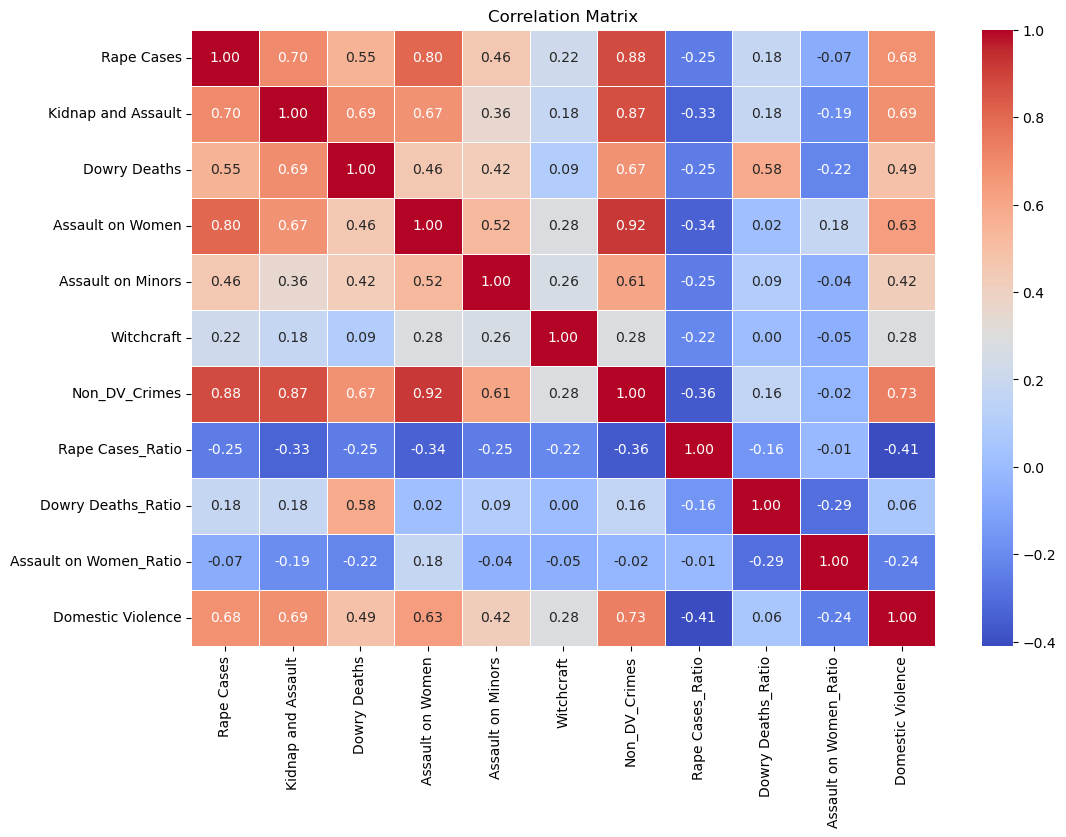

In [28]:
# Correlation matrix for selected features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = crimes_df_cleaned[final_features + ['Domestic Violence']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


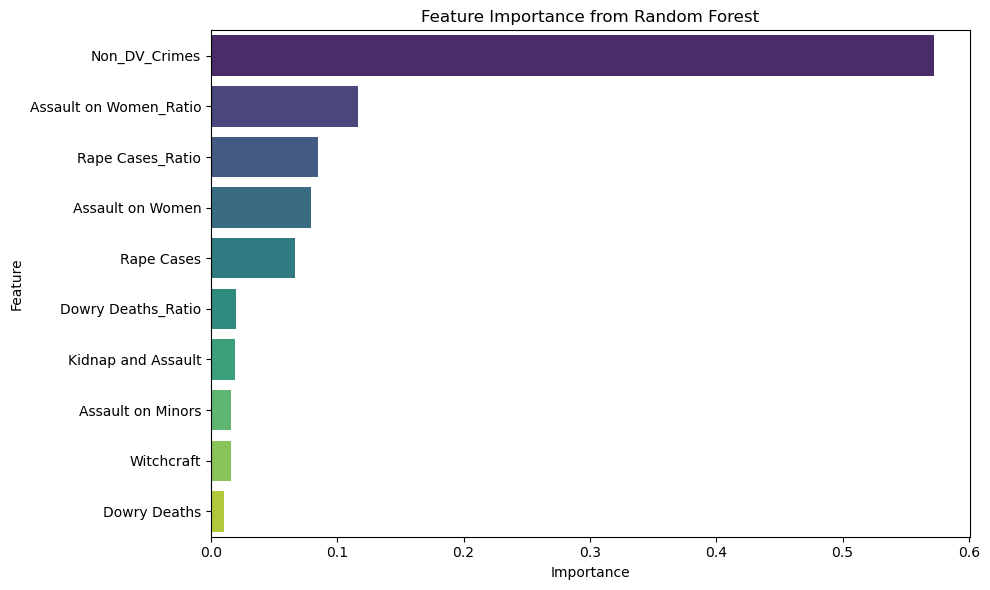

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest on original (unscaled) features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a dataframe for easy visualization
feature_imp_df = pd.DataFrame({'Feature': final_features, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


In [30]:
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches dropped X
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_mask = selector.get_support()
selected_features = [f for f, s in zip(final_features, selected_mask) if s]

print("Top 5 selected features:", selected_features)


Top 5 selected features: ['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths', 'Assault on Women', 'Non_DV_Crimes']


**Model Training & Hyperparameter Tuning**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("🔹 Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression Results:
MAE: 1478.3373426518503
R² Score: 0.5469277310486031


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize base model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# Grid Search with 3-fold CV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                       scoring='r2', cv=3, n_jobs=-1)

grid_rf.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("🔹 Random Forest Results:")
print("Best Params:", grid_rf.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


🔹 Random Forest Results:
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
MAE: 647.275696255682
R² Score: 0.8075058220551543


In [34]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("\n🔹 XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))



🔹 XGBoost Results:
MAE: 608.3184407208416
R² Score: 0.8341290950775146


**Model Evaluation & Visualization**

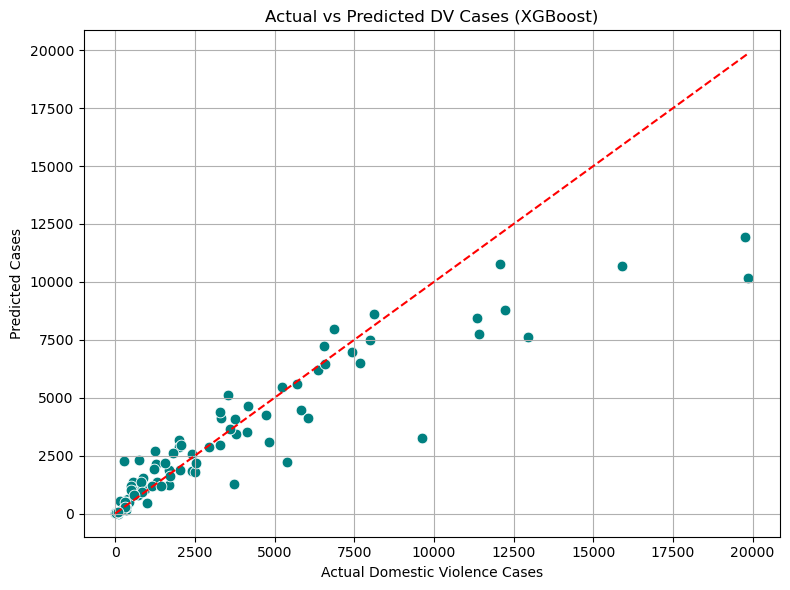

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
plt.title("Actual vs Predicted DV Cases (XGBoost)")
plt.xlabel("Actual Domestic Violence Cases")
plt.ylabel("Predicted Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


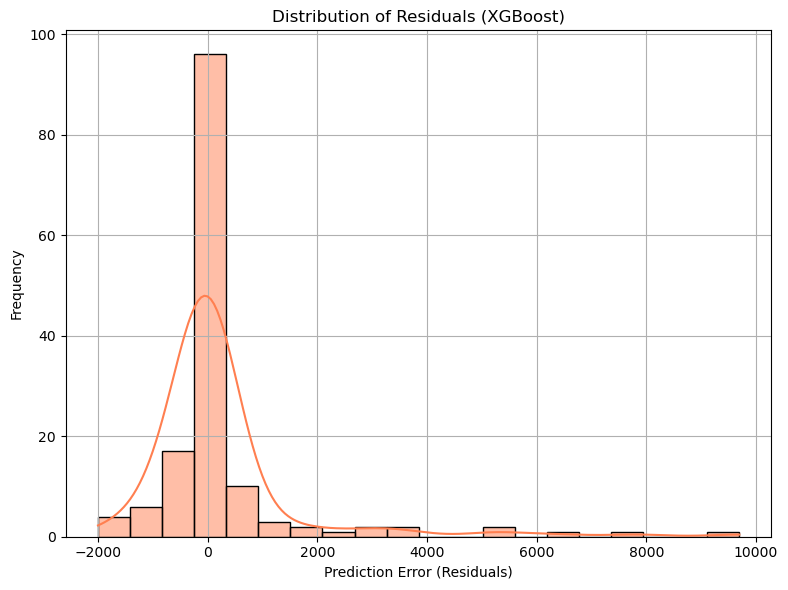

In [36]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='coral')
plt.title("Distribution of Residuals (XGBoost)")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
import joblib

# Save model to file
joblib.dump(xgb_model, "xgboost_dv_model.pkl")


['xgboost_dv_model.pkl']

 Visualization Dashboard + Project Summary

In [39]:
import plotly.express as px
import pandas as pd

# Create a dataframe of actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})

fig = px.scatter(results_df, x='Actual', y='Predicted',
                 title="Actual vs Predicted DV Cases (XGBoost)",
                 trendline='ols', color_discrete_sequence=['darkblue'])

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(width=800, height=500)
fig.show()


In [40]:
# Get selected features from SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=6)
selector.fit(X, y)

# Boolean mask of selected columns
selected_mask = selector.get_support()

# Extract actual column names
selected_features = X.columns[selected_mask].tolist()
print("Selected Features:", selected_features)


Selected Features: ['Rape Cases', 'Kidnap and Assault', 'Dowry Deaths', 'Assault on Women', 'Assault on Minors', 'Non_DV_Crimes']


In [41]:
importances = xgb_model.feature_importances_

feature_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import plotly.express as px

fig = px.bar(feature_df,
             x='Importance', y='Feature',
             title='XGBoost Feature Importance',
             orientation='h',
             color='Importance',
             color_continuous_scale='Viridis')

fig.update_layout(width=800, height=500)
fig.show()
